# 서울시 코로나19 확진자 현황 API

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
with open('../static/data/seoul_api_key.txt', mode='r') as key_fd:
    seoulapi_key = key_fd.read(100)

In [3]:
corona_url = 'http://openapi.seoul.go.kr:8088'
type = 'xml'
start_index = 1
end_index = 1000
url = f'{corona_url}/{seoulapi_key}/{type}/Corona19Status/{start_index}/{end_index}'

In [7]:
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
resultCode = soup.find('RESULT').find('CODE').get_text()
if resultCode == 'INFO-000':
    list_total_count = int(soup.find('list_total_count').get_text())
    print(list_total_count)
else:
    print(soup.find('RESULT').find('MESSAGE').get_text())

22717


In [8]:
list_total_count = soup.find('list_total_count').get_text()
list_total_count

'22717'

In [9]:
items = soup.find_all('row')

In [10]:
id_list, date_list, no_list, country_list = [],[],[],[]
personal_list, area_list, travel_list, contact_list = [],[],[],[]
corrective_list, status_list, moving_list, idate_list = [],[],[],[]
mdate_list = []
for item in items:
    id_list.append(item.find('CORONA19_ID').string)
    date_list.append(item.find('CORONA19_DATE').string)
    no_list.append(item.find('CORONA19_NO').string)
    country_list.append(item.find('CORONA19_COUNTRY').string)
    personal_list.append(item.find('CORONA19_PERSONAL').string)
    area_list.append(item.find('CORONA19_AREA').string)
    travel_list.append(item.find('CORONA19_TRAVEL_HISTORY').string)
    contact_list.append(item.find('CORONA19_CONTACT_HISTORY').string)
    corrective_list.append(item.find('CORONA19_CORRECTIVE').string)
    status_list.append(item.find('CORONA19_LEAVE_STATUS').string)
    moving_list.append(item.find('CORONA19_MOVING_PATH').string)
    idate_list.append(item.find('CORONA19_IDATE').string)
    mdate_list.append(item.find('CORONA19_MDATE').string)

df = pd.DataFrame({
    '연번':id_list, '확진일':date_list, '환자번호':no_list, '국적':country_list,
    '환자정보':personal_list, '지역':area_list, '여행력':travel_list,
    '접촉력':contact_list, '조치사항':corrective_list, '상태':status_list, 
    '이동경로':moving_list, '등록일':idate_list, '수정일':mdate_list
})
df.tail()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
995,21722,2021-01-11,None,None,None,성동구,None,성동구 소재 거주시설/요양시설 관련,None,None,None,2021-01-19 10:13:05,2021-01-19 10:13:05
996,21721,2021-01-11,None,None,None,성동구,None,성동구 소재 거주시설/요양시설 관련,None,None,None,2021-01-19 10:13:05,2021-01-19 10:13:05
997,21720,2021-01-11,None,None,None,성동구,None,성동구 소재 거주시설/요양시설 관련,None,None,None,2021-01-19 10:13:05,2021-01-19 10:13:05
998,21719,2021-01-11,None,None,None,성동구,None,성동구 소재 거주시설/요양시설 관련,None,None,None,2021-01-19 10:13:05,2021-01-19 10:13:05
999,21718,2021-01-11,None,None,None,종로구,None,기타 확진자 접촉,None,None,None,2021-01-19 10:13:05,2021-01-19 10:13:05


### 모든 데이터에 대해 처리

In [11]:
from tqdm import tqdm_notebook

In [12]:
id_list, date_list, no_list, country_list = [],[],[],[]
personal_list, area_list, travel_list, contact_list = [],[],[],[]
corrective_list, status_list, moving_list, idate_list = [],[],[],[]
mdate_list = []
for i in tqdm_notebook(range(1, int(list_total_count), 1000)):
    start_index = i
    end_index = i+1000-1 if i+1000-1<int(list_total_count) else int(list_total_count)
    url = f'{corona_url}/{seoulapi_key}/{type}/Corona19Status/{start_index}/{end_index}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'xml')
    items = soup.find_all('row')

    for item in items:
        id_list.append(item.find('CORONA19_ID').string)
        date_list.append(item.find('CORONA19_DATE').string)
        no_list.append(item.find('CORONA19_NO').string)
        country_list.append(item.find('CORONA19_COUNTRY').string)
        personal_list.append(item.find('CORONA19_PERSONAL').string)
        area_list.append(item.find('CORONA19_AREA').string)
        travel_list.append(item.find('CORONA19_TRAVEL_HISTORY').string)
        contact_list.append(item.find('CORONA19_CONTACT_HISTORY').string)
        corrective_list.append(item.find('CORONA19_CORRECTIVE').string)
        status_list.append(item.find('CORONA19_LEAVE_STATUS').string)
        moving_list.append(item.find('CORONA19_MOVING_PATH').string)
        idate_list.append(item.find('CORONA19_IDATE').string)
        mdate_list.append(item.find('CORONA19_MDATE').string)

In [13]:
df = pd.DataFrame({
    '연번':id_list, '확진일':date_list, '환자번호':no_list, '국적':country_list,
    '환자정보':personal_list, '지역':area_list, '여행력':travel_list,
    '접촉력':contact_list, '조치사항':corrective_list, '상태':status_list, 
    '이동경로':moving_list, '등록일':idate_list, '수정일':mdate_list
})
df.tail()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
22712,5,2020-01-31,None,None,None,성북구,None,기타 확진자 접촉,None,퇴원,이동경로 공개기간 경과,2021-01-14 11:16:47,2021-01-14 11:16:47
22713,4,2020-01-30,None,None,None,마포구,중국,해외유입,None,퇴원,이동경로 공개기간 경과,2021-01-14 11:16:47,2021-01-14 11:16:47
22714,3,2020-01-30,None,None,None,종로구,None,종로구 집단발병,None,퇴원,이동경로 공개기간 경과,2021-01-14 11:16:47,2021-01-14 11:16:47
22715,2,2020-01-30,None,None,None,중랑구,중국,해외유입,None,퇴원,이동경로 공개기간 경과,2021-01-14 11:16:47,2021-01-14 11:16:47
22716,1,2020-01-24,None,None,None,강서구,중국,해외유입,None,퇴원,이동경로 공개기간 경과,2021-01-14 11:16:47,2021-01-14 11:16:47


In [14]:
df.to_csv('../static/tmp/covid-seoul.csv')

In [15]:
df = pd.read_csv('../static/tmp/covid-seoul.csv')

In [16]:
df['연번'] = df['연번'].astype(int)
df.head()

,Unnamed: 0,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
0,0,22717,2021-01-18,NaN,NaN,NaN,타시도,NaN,타시도 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
1,1,22716,2021-01-18,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
2,2,22715,2021-01-18,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
3,3,22714,2021-01-18,NaN,NaN,NaN,서대문구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
4,4,22713,2021-01-18,NaN,NaN,NaN,강북구,NaN,타시도 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07


In [17]:
df.sort_values('연번', inplace=True)
df.set_index('연번', inplace=True)
df.tail()

,Unnamed: 0,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
연번,,,,,,,,,,,,,
22713,4,2021-01-18,NaN,NaN,NaN,강북구,NaN,타시도 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
22714,3,2021-01-18,NaN,NaN,NaN,서대문구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
22715,2,2021-01-18,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
22716,1,2021-01-18,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
22717,0,2021-01-18,NaN,NaN,NaN,타시도,NaN,타시도 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07


In [18]:
df['확진일'] = pd.to_datetime(df['확진일'])
df.tail()

,Unnamed: 0,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
연번,,,,,,,,,,,,,
22713,4,2021-01-18,NaN,NaN,NaN,강북구,NaN,타시도 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
22714,3,2021-01-18,NaN,NaN,NaN,서대문구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
22715,2,2021-01-18,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
22716,1,2021-01-18,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07
22717,0,2021-01-18,NaN,NaN,NaN,타시도,NaN,타시도 확진자 접촉,NaN,NaN,NaN,2021-01-19 10:13:07,2021-01-19 10:13:07


In [19]:
df['환자번호'].isna().sum(),df['국적'].isna().sum(),df['환자정보'].isna().sum(),df['조치사항'].isna().sum()

(22717, 22717, 22717, 22717)

In [20]:
df['등록일'].unique()

array(['2021-01-14 11:16:47', '2021-01-14 11:16:48',
       '2021-01-14 11:16:49', '2021-01-14 11:16:50',
       '2021-01-14 11:16:51', '2021-01-14 11:16:52',
       '2021-01-14 11:16:53', '2021-01-14 11:16:54',
       '2021-01-14 11:16:55', '2021-01-14 11:16:56',
       '2021-01-14 11:16:57', '2021-01-14 11:16:58',
       '2021-01-14 11:16:59', '2021-01-14 11:17:00',
       '2021-01-14 11:17:01', '2021-01-14 11:17:02',
       '2021-01-14 11:17:03', '2021-01-14 11:17:04',
       '2021-01-14 11:17:05', '2021-01-14 11:17:06',
       '2021-01-14 11:17:07', '2021-01-19 10:12:42',
       '2021-01-19 10:12:43', '2021-01-19 10:12:44',
       '2021-01-19 10:12:45', '2021-01-19 10:12:46',
       '2021-01-19 10:12:47', '2021-01-19 10:12:48',
       '2021-01-19 10:12:49', '2021-01-19 10:12:50',
       '2021-01-19 10:12:51', '2021-01-19 10:12:52',
       '2021-01-19 10:12:53', '2021-01-19 10:12:54',
       '2021-01-19 10:12:55', '2021-01-19 10:12:56',
       '2021-01-19 10:12:57', '2021-01-19 10:1

In [21]:
df['수정일'].unique()

array(['2021-01-14 11:16:47', '2021-01-14 11:17:30',
       '2021-01-14 11:16:48', '2021-01-14 11:16:49',
       '2021-01-14 11:16:50', '2021-01-14 11:16:51',
       '2021-01-14 11:16:52', '2021-01-14 11:16:53',
       '2021-01-14 11:16:54', '2021-01-14 11:16:55',
       '2021-01-14 11:27:02', '2021-01-14 11:16:56',
       '2021-01-14 11:16:57', '2021-01-14 11:16:58',
       '2021-01-14 11:16:59', '2021-01-14 11:17:00',
       '2021-01-14 11:17:01', '2021-01-14 11:17:02',
       '2021-01-14 11:17:03', '2021-01-14 11:17:04',
       '2021-01-14 11:17:05', '2021-01-14 11:17:06',
       '2021-01-14 11:17:07', '2021-01-19 10:12:42',
       '2021-01-19 10:12:43', '2021-01-19 10:13:24',
       '2021-01-19 10:12:44', '2021-01-19 10:12:45',
       '2021-01-19 10:12:46', '2021-01-19 10:12:47',
       '2021-01-19 10:12:48', '2021-01-19 10:12:49',
       '2021-01-19 10:12:50', '2021-01-19 10:12:51',
       '2021-01-19 10:12:52', '2021-01-19 10:12:53',
       '2021-01-19 10:12:54', '2021-01-19 10:1

In [22]:
df['이동경로'].unique()

array(['이동경로 공개기간 경과', nan,
       '◯ 타 지역 방문 - 2020.12.30. 08:40~21:00 ◯ 관내 마트(접촉자 없음·방역소독 완료·마스크 착용) - 2020.12.31. 17:00~17:55',
       '마포구 자택 1.1.(금)~1.3.(일) 13:40 소독완료', '요양원 입소자로 이동동선 없음',
       '요양원(자양1동) 입소자로 이동동선 없음', '광진구 관내 이동동선 없음'], dtype=object)

In [23]:
df.head()

,Unnamed: 0,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
연번,,,,,,,,,,,,,
1,22716,2020-01-24,NaN,NaN,NaN,강서구,중국,해외유입,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16:47,2021-01-14 11:16:47
2,22715,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16:47,2021-01-14 11:16:47
3,22714,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16:47,2021-01-14 11:16:47
4,22713,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16:47,2021-01-14 11:16:47
5,22712,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16:47,2021-01-14 11:16:47


In [24]:
df = df[['확진일', '지역', '여행력', '접촉력', '상태', '이동경로']]
df.head()

,확진일,지역,여행력,접촉력,상태,이동경로
연번,,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원,이동경로 공개기간 경과
2,2020-01-30,중랑구,중국,해외유입,퇴원,이동경로 공개기간 경과
3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원,이동경로 공개기간 경과
4,2020-01-30,마포구,중국,해외유입,퇴원,이동경로 공개기간 경과
5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원,이동경로 공개기간 경과


In [25]:
df.to_csv('../static/tmp/covid-seoul2.csv')

### 데이터 클렌징

In [26]:
df = pd.read_csv('../static/tmp/covid-seoul2.csv')
df.tail()

,연번,확진일,지역,여행력,접촉력,상태,이동경로
22712,22713,2021-01-18,강북구,NaN,타시도 확진자 접촉,NaN,NaN
22713,22714,2021-01-18,서대문구,NaN,기타 확진자 접촉,NaN,NaN
22714,22715,2021-01-18,타시도,NaN,감염경로 조사중,NaN,NaN
22715,22716,2021-01-18,타시도,NaN,기타 확진자 접촉,NaN,NaN
22716,22717,2021-01-18,타시도,NaN,타시도 확진자 접촉,NaN,NaN


In [27]:
df['지역'].fillna('기타', inplace=True)
df.fillna(' ', inplace=True)
df.tail()

,연번,확진일,지역,여행력,접촉력,상태,이동경로
22712,22713,2021-01-18,강북구,,타시도 확진자 접촉,,
22713,22714,2021-01-18,서대문구,,기타 확진자 접촉,,
22714,22715,2021-01-18,타시도,,감염경로 조사중,,
22715,22716,2021-01-18,타시도,,기타 확진자 접촉,,
22716,22717,2021-01-18,타시도,,타시도 확진자 접촉,,


In [28]:
df['지역'].unique()

array(['강서구', '중랑구', '종로구', '마포구', '성북구', '타시도', '송파구', '서대문구', '성동구',
       '서초구', '구로구', '강동구', '은평구', '관악구', '금천구', '노원구', '동작구', '강남구',
       '양천구', '동대문구', '광진구', '영등포구', '도봉구', '용산구', '강북구', '중구', '기타',
       '영등포구 ', '관악구 ', '중랑구 ', '강동구 ', '성북구 ', '강서구 ', '동작구 ', '양천구 ',
       '은평구 ', '송파구 ', '마포구 ', '서대문구 ', '금천구 ', '종로구 ', '도봉구 ', '중구 ',
       '동대문구 ', '용산구 ', '강북구 ', '노원구 ', '구로구 ', '광진구 ', '서초구 ', '은평구   ',
       '강남구 ', '성동구 ', ' 송파구', ' 은평구'], dtype=object)

In [29]:
df['지역'] = df['지역'].map(lambda s: s.strip())

In [30]:
df['지역'].unique()

array(['강서구', '중랑구', '종로구', '마포구', '성북구', '타시도', '송파구', '서대문구', '성동구',
       '서초구', '구로구', '강동구', '은평구', '관악구', '금천구', '노원구', '동작구', '강남구',
       '양천구', '동대문구', '광진구', '영등포구', '도봉구', '용산구', '강북구', '중구', '기타'],
      dtype=object)

In [31]:
df['상태'].unique()

array(['퇴원', '사망', ' '], dtype=object)

In [32]:
df.head()

,연번,확진일,지역,여행력,접촉력,상태,이동경로
0,1,2020-01-24,강서구,중국,해외유입,퇴원,이동경로 공개기간 경과
1,2,2020-01-30,중랑구,중국,해외유입,퇴원,이동경로 공개기간 경과
2,3,2020-01-30,종로구,,종로구 집단발병,퇴원,이동경로 공개기간 경과
3,4,2020-01-30,마포구,중국,해외유입,퇴원,이동경로 공개기간 경과
4,5,2020-01-31,성북구,,기타 확진자 접촉,퇴원,이동경로 공개기간 경과


In [33]:
df.to_csv('../static/tmp/covid-seoul3.csv')

### Database에 저장

In [58]:
import sqlite3
conn = sqlite3.connect('../db/covid.db')
cur = conn.cursor()

In [35]:
params = [int(df.iloc[0,0])]
params.extend(df.iloc[0,1:])
params

[1, '2020-01-24', '강서구', '중국', '해외유입', '퇴원', '이동경로 공개기간 경과']

In [36]:
sql_table = '''create table if not exists seoul (
  sid integer not null primary key,
  confDay text not null,
  region text not null,
  travelHist text,
  contactHist text,
  status text,
  moving text);
'''
cur.execute(sql_table)
conn.commit()

In [37]:
sql_insert = 'insert into seoul values(?,?,?,?,?,?,?);'
for i in df.index:
    params = [int(df.iloc[i,0])]
    params.extend(df.iloc[i,1:])
    cur.execute(sql_insert, params)
    if i % 100 == 0:
        print(i//100, end=' ')
        conn.commit()
conn.commit()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 

In [38]:
cur.close()
conn.close()

### DB에서 읽어서 화면을 만드는 코드

In [39]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [57]:
def get_seoul_items_by_gu(items, gu):
    conn = sqlite3.connect('../db/covid.db')
    cur = conn.cursor()

    sql = f'select {items} from seoul where region=?;'
    cur.execute(sql, (gu,))
    rows = cur.fetchall()
    
    cur.close()
    conn.close()
    return rows

In [41]:
gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구',
           '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
           '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [42]:
gu = '강서구'
items = 'sid, confDay, region, status'
rows = get_seoul_items_by_gu(items, gu)
rows[:5]

[(1, '2020-01-24', '강서구', '퇴원'),
 (27, '2020-02-23', '강서구', '퇴원'),
 (107, '2020-03-06', '강서구', '퇴원'),
 (144, '2020-03-09', '강서구', '퇴원'),
 (150, '2020-03-09', '강서구', '퇴원')]

In [43]:
c_rows = []
c_rows.extend(rows)
c_rows[:5]

[(1, '2020-01-24', '강서구', '퇴원'),
 (27, '2020-02-23', '강서구', '퇴원'),
 (107, '2020-03-06', '강서구', '퇴원'),
 (144, '2020-03-09', '강서구', '퇴원'),
 (150, '2020-03-09', '강서구', '퇴원')]

In [44]:
c_rows = []
for gu in gu_list:
    rows = get_seoul_items_by_gu(items, gu)
    c_rows.extend(rows)

In [45]:
df = pd.DataFrame(c_rows, columns=['sid', '확진일', 'gu', 'status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19930 entries, 0 to 19929
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sid     19930 non-null  int64 
 1   확진일     19930 non-null  object
 2   gu      19930 non-null  object
 3   status  19930 non-null  object
dtypes: int64(1), object(3)
memory usage: 622.9+ KB


In [46]:
df['확진일'] = pd.to_datetime(df['확진일'])

In [47]:
cdf_raw = pd.pivot_table(df, values='sid', index='확진일', columns='gu', aggfunc='count')
cdf_raw.fillna(0, inplace=True)
cdf_raw = cdf_raw.astype(int)
cdf_raw.head()

gu,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2020-01-31,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,0
2020-02-05,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2020-02-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
cdf

gu,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,3,0,1
2020-02-29,7,4,0,1,4,1,1,1,8,0,...,3,1,12,1,2,0,7,8,0,0
2020-03-31,34,6,5,20,30,5,33,11,12,6,...,3,13,15,17,18,12,14,4,5,12
2020-04-30,23,3,0,4,9,2,1,0,3,3,...,13,9,10,3,5,6,7,1,1,3
2020-05-31,11,11,9,19,16,6,6,3,8,10,...,21,5,11,7,11,20,7,3,3,3
2020-06-30,7,11,10,33,59,3,45,17,13,43,...,9,4,7,42,29,12,18,3,3,14
2020-07-31,15,14,4,25,27,5,5,7,6,2,...,8,9,44,0,7,4,11,6,8,11
2020-08-31,88,94,85,117,109,74,60,34,191,73,...,33,243,161,79,68,48,121,37,31,103
2020-09-30,83,42,31,65,135,34,32,20,60,69,...,31,48,80,31,53,21,65,23,8,41


In [50]:
cdf = cdf_raw.resample('M').sum().astype(int)
cdf.index = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월','2020년1월']
cdf

gu,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
1월,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,3,0,1
2월,7,4,0,1,4,1,1,1,8,0,...,3,1,12,1,2,0,7,8,0,0
3월,34,6,5,20,30,5,33,11,12,6,...,3,13,15,17,18,12,14,4,5,12
4월,23,3,0,4,9,2,1,0,3,3,...,13,9,10,3,5,6,7,1,1,3
5월,11,11,9,19,16,6,6,3,8,10,...,21,5,11,7,11,20,7,3,3,3
6월,7,11,10,33,59,3,45,17,13,43,...,9,4,7,42,29,12,18,3,3,14
7월,15,14,4,25,27,5,5,7,6,2,...,8,9,44,0,7,4,11,6,8,11
8월,88,94,85,117,109,74,60,34,191,73,...,33,243,161,79,68,48,121,37,31,103
9월,83,42,31,65,135,34,32,20,60,69,...,31,48,80,31,53,21,65,23,8,41
10월,87,19,15,22,86,11,22,5,33,22,...,18,17,61,13,18,21,19,7,7,21


In [51]:
cdfT = cdf.T
cdfT

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,2020년1월
gu,,,,,,,,,,,,,
강남구,0,7,34,23,11,7,15,88,83,87,159,416,134
강동구,0,4,6,3,11,11,14,94,42,19,74,290,124
강북구,0,0,5,0,9,10,4,85,31,15,41,242,139
강서구,1,1,20,4,19,33,25,117,65,22,305,730,153
관악구,0,4,30,9,16,59,27,109,135,86,74,476,94
광진구,0,1,5,2,6,3,5,74,34,11,43,282,93
구로구,0,1,33,1,6,45,5,60,32,22,72,331,122
금천구,0,1,11,0,3,17,7,34,20,5,27,199,56
노원구,0,8,12,3,8,13,6,191,60,33,144,337,126


In [52]:
cdfT['합계'] = cdfT.sum(axis=1)
cdfT

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,2020년1월,합계
gu,,,,,,,,,,,,,,
강남구,0,7,34,23,11,7,15,88,83,87,159,416,134,1064
강동구,0,4,6,3,11,11,14,94,42,19,74,290,124,692
강북구,0,0,5,0,9,10,4,85,31,15,41,242,139,581
강서구,1,1,20,4,19,33,25,117,65,22,305,730,153,1495
관악구,0,4,30,9,16,59,27,109,135,86,74,476,94,1119
광진구,0,1,5,2,6,3,5,74,34,11,43,282,93,559
구로구,0,1,33,1,6,45,5,60,32,22,72,331,122,730
금천구,0,1,11,0,3,17,7,34,20,5,27,199,56,380
노원구,0,8,12,3,8,13,6,191,60,33,144,337,126,941


In [53]:
cdf['합계'] = cdf.sum(axis=1)
cdf

gu,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,합계
1월,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0,1,7
2월,7,4,0,1,4,1,1,1,8,0,...,1,12,1,2,0,7,8,0,0,71
3월,34,6,5,20,30,5,33,11,12,6,...,13,15,17,18,12,14,4,5,12,369
4월,23,3,0,4,9,2,1,0,3,3,...,9,10,3,5,6,7,1,1,3,144
5월,11,11,9,19,16,6,6,3,8,10,...,5,11,7,11,20,7,3,3,3,217
6월,7,11,10,33,59,3,45,17,13,43,...,4,7,42,29,12,18,3,3,14,434
7월,15,14,4,25,27,5,5,7,6,2,...,9,44,0,7,4,11,6,8,11,268
8월,88,94,85,117,109,74,60,34,191,73,...,243,161,79,68,48,121,37,31,103,2246
9월,83,42,31,65,135,34,32,20,60,69,...,48,80,31,53,21,65,23,8,41,1179
10월,87,19,15,22,86,11,22,5,33,22,...,17,61,13,18,21,19,7,7,21,651


In [54]:
cdf_raw['합계'] = cdf_raw.sum(axis=1)
cdf_raw.tail()

gu,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,합계
확진일,,,,,,,,,,,,,,,,,,,,,
2021-01-14,3,9,3,3,4,8,8,4,4,6,...,1,5,1,5,5,6,2,1,7,115
2021-01-15,7,7,5,5,4,4,3,2,6,3,...,12,11,4,4,7,7,1,1,7,136
2021-01-16,6,1,2,10,7,3,10,5,8,1,...,7,5,9,2,2,12,4,3,5,135
2021-01-17,6,4,6,3,2,3,2,7,5,4,...,5,5,6,5,4,3,3,3,2,127
2021-01-18,7,3,4,4,2,2,9,1,1,4,...,4,10,9,1,4,2,1,4,5,95


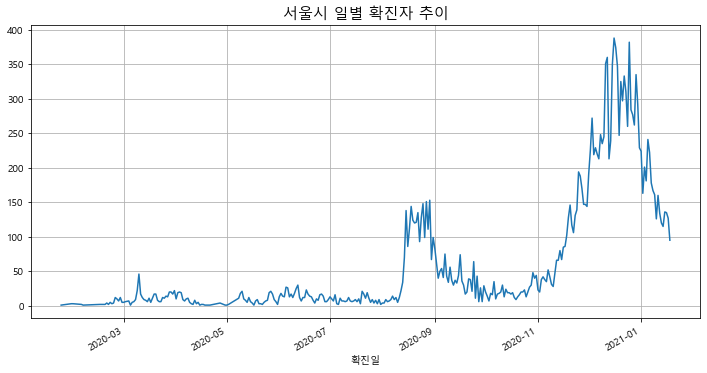

In [55]:
cdf_raw['합계'].plot(grid=True, figsize=(12,6))
plt.title('서울시 일별 확진자 추이', fontsize=15)
plt.show()

In [59]:
cur.close()
conn.close()

### 구별 인구 데이터와 결합하기

In [60]:
pop = pd.read_csv('../static/data/cctv.csv')
pop.set_index('구별', inplace=True)
pop.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483,0.406468,526.315431
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862,0.403444,710.063146
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814,0.274284,1156.473682
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743


In [61]:
pop_corona = pd.DataFrame({'확진자수':cdfT['합계']})
pop_corona['인구수'] = pop['인구수']
pop_corona.head()

,확진자수,인구수
gu,,
강남구,1064,544085
강동구,692,462275
강북구,581,313550
강서구,1495,589536
관악구,1119,514555


In [62]:
pop_corona['천명당 확진자 수'] = pop_corona['확진자수'] / pop_corona['인구수'] * 1000
pop_corona.head()

,확진자수,인구수,천명당 확진자 수
gu,,,
강남구,1064,544085,1.955577
강동구,692,462275,1.496944
강북구,581,313550,1.852974
강서구,1495,589536,2.535893
관악구,1119,514555,2.174695


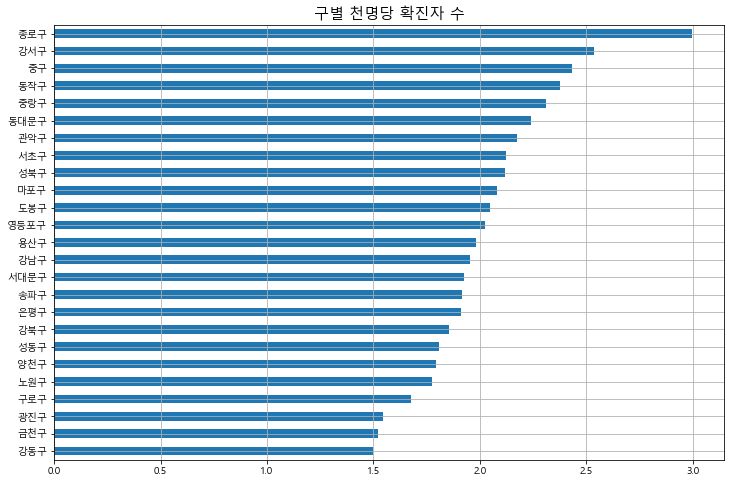

In [63]:
pop_corona['천명당 확진자 수'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 천명당 확진자 수', fontsize=15)
plt.ylabel('')
plt.show()

In [64]:
cdfT['인구수'] = pop['인구수']
cdfT.head()

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,2020년1월,합계,인구수
gu,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,7,15,88,83,87,159,416,134,1064,544085
강동구,0,4,6,3,11,11,14,94,42,19,74,290,124,692,462275
강북구,0,0,5,0,9,10,4,85,31,15,41,242,139,581,313550
강서구,1,1,20,4,19,33,25,117,65,22,305,730,153,1495,589536
관악구,0,4,30,9,16,59,27,109,135,86,74,476,94,1119,514555


### 지도 시각화

In [65]:
import folium
import json
geo_data = json.load(open('../static/data/skorea_municipalities_geo_simple.json',
                         encoding='utf8'))

In [66]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_data,
               data = pop_corona['확진자수'],
               columns = [pop_corona.index, pop_corona['확진자수']],
               fill_color = 'PuRd',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>누적 확진자수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

In [67]:

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_data,
               data = pop_corona['천명당 확진자 수'],
               columns = [pop_corona.index, pop_corona['천명당 확진자 수']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>천명당 확진자 수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map